In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("../input/videogamesales/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

I want to see the relation between Platform and Genre. So, used pd.crosstab

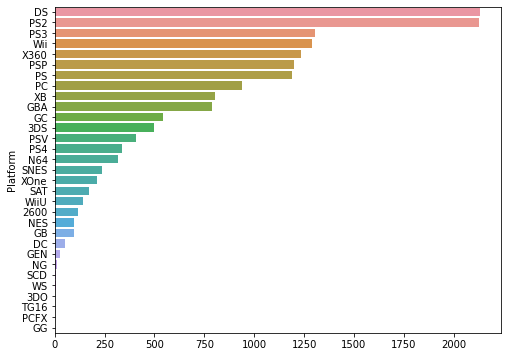

In [7]:
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

You can see DS and PS2 have the most games in their platform and now, we can see the detail of genre of game in platform that have more than 1000 games. In the seaborn, it is easy to use heatrmap rather than the stacked bar, so we can use the heatmap to have a try.

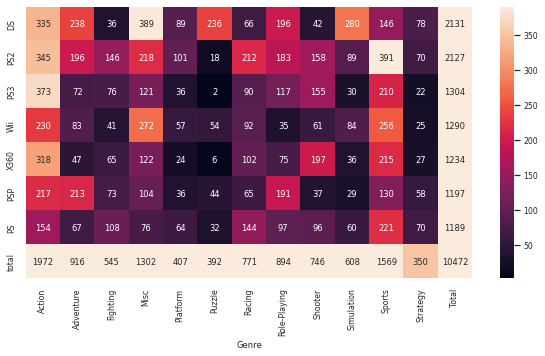

In [8]:
platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=0.7)
plt.figure(figsize=(10,5))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.xticks(rotation = 90)
plt.show()

So, you can see the popular genre game of DS, PS2 and PS3.

And we also can get each genre of game sales in every area by groupby. And we will show you the absolute data and the percentage in the same time.

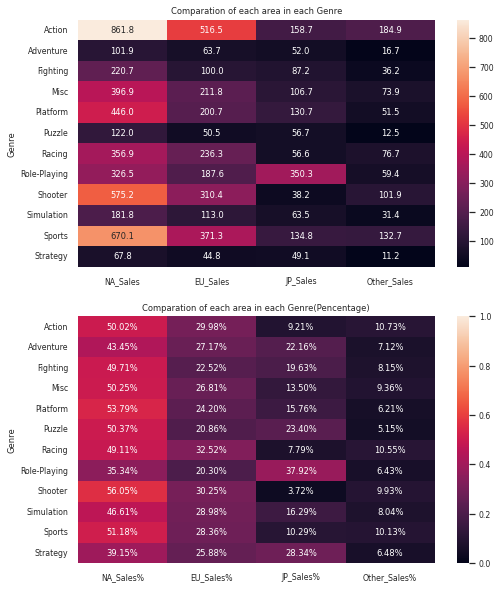

In [9]:
GenreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(8, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

So, the percentage is more clearly than the abosulute amount.

Here is a VERY IMPORTANT step, I will now filter the entries, I will only take entries where the Year of release is >=2000

In [10]:
sales = df.copy()
sales = sales.drop(sales[sales.Year < 2000].index)

Now, another step of cleaning, I will check if the Entries for the 'Global_Sales' really match the Original formula (NA+EU+JP+Other Sales)

In [11]:
sales['Calc_Global']= (sales['NA_Sales'] + sales['EU_Sales'] + sales['JP_Sales'] + sales['Other_Sales'])
sales['Calc_Global'].head()

0    82.74
2    35.83
3    33.00
6    30.01
7    29.01
Name: Calc_Global, dtype: float64

In [12]:
(sales['Calc_Global'] != sales['Global_Sales']).sum()

5947

In [13]:
sales['Year'].unique()

array([2006., 2008., 2009., 2005., 2007., 2010., 2013., 2004., 2002.,
       2001., 2011., 2015., 2012., 2014., 2003., 2000., 2016., 2020.,
       2017.])

Checking if our Year>=2000 filter works

# Sales Analysis For years > 2000

Starting off, I will run the analysis on the North American Region, only releases between the Years 2000~2020 will be considered.

In [14]:
NA_genre = sales.groupby(by=['Genre'])['NA_Sales'].sum()
NA_genre = NA_genre.reset_index()
NA_genre = NA_genre.sort_values(by=['NA_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in NA per Genre (Years 2000 to 2020)')

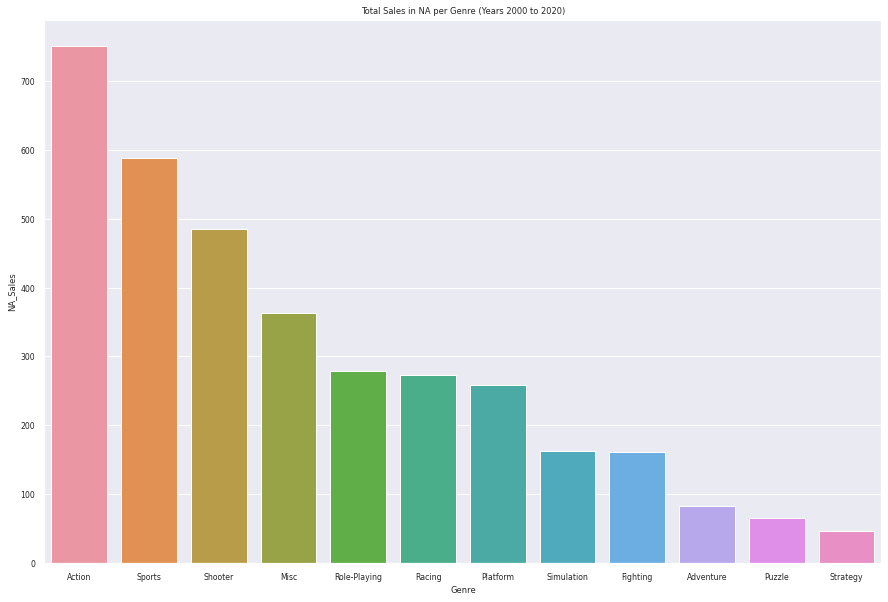

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="NA_Sales",data=NA_genre)
plt.title('Total Sales in NA per Genre (Years 2000 to 2020)')

As we can observe above, Action was by far the best seller, with Sports and Shooter right below.

### Now we will check which platforms were the most requisited

In [16]:
NA_plat = sales.groupby(by=['Platform'])['NA_Sales'].sum()
NA_plat = NA_plat.reset_index()
NA_plat = NA_plat.sort_values(by=['NA_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in NA per Platform (Years 2000 to 2020)')

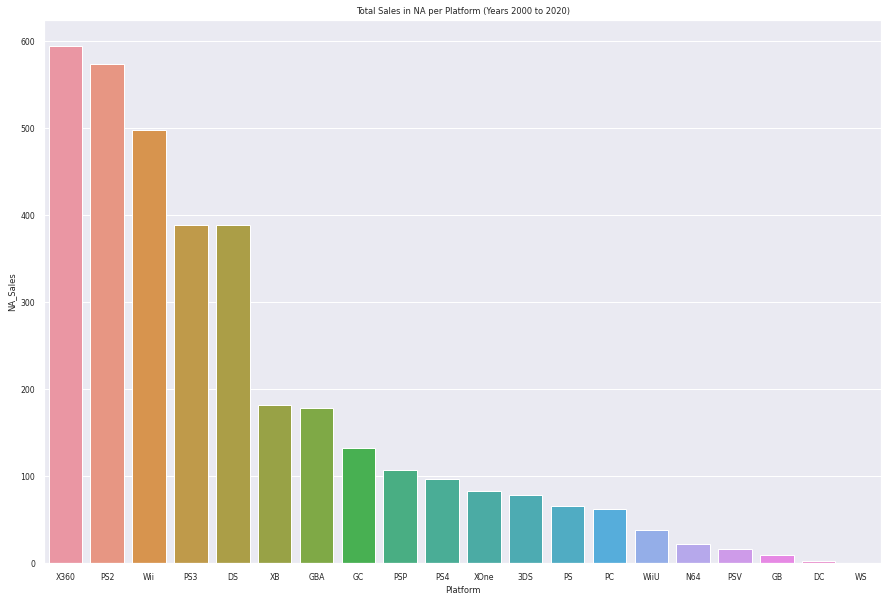

In [17]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="NA_Sales",data=NA_plat)

plt.title('Total Sales in NA per Platform (Years 2000 to 2020)')

Success, XBOX360 takes the first spot, but not far from PS2 followed by Wii.



### Finally, Publishers are next.

In [18]:
NA_pub = sales[['Publisher', 'NA_Sales']]
NA_pub = NA_pub.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).head(10)
NA_pub = pd.DataFrame(NA_pub).reset_index()